### Import libraries

In [200]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as w
%matplotlib inline

pd.set_option("display.max_rows", None,"display.max_columns", None)
w.simplefilter(action='ignore')
plt.style.use('seaborn')


### Read Dataset

In [201]:
# declare & preview df
df = pd.read_csv("data.csv")
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [202]:
# set all column names to lower case
df.columns = df.columns.str.lower()

In [203]:
# nr of rows / columns
df.shape

(96453, 12)

In [204]:
# data types
df.dtypes

formatted date               object
summary                      object
precip type                  object
temperature (c)             float64
apparent temperature (c)    float64
humidity                    float64
wind speed (km/h)           float64
wind bearing (degrees)      float64
visibility (km)             float64
loud cover                  float64
pressure (millibars)        float64
daily summary                object
dtype: object

 - Declare categoricals & numericals feature variables

In [205]:
categorical_features = df.select_dtypes(include=["object"]).keys()
print(categorical_features)

Index(['formatted date', 'summary', 'precip type', 'daily summary'], dtype='object')


In [206]:
numerical_features = df.select_dtypes(include=["int64","float64"]).keys()
print(numerical_features)

Index(['temperature (c)', 'apparent temperature (c)', 'humidity',
       'wind speed (km/h)', 'wind bearing (degrees)', 'visibility (km)',
       'loud cover', 'pressure (millibars)'],
      dtype='object')


In [207]:
# check null values for columns
df.isnull().sum()

formatted date                0
summary                       0
precip type                 517
temperature (c)               0
apparent temperature (c)      0
humidity                      0
wind speed (km/h)             0
wind bearing (degrees)        0
visibility (km)               0
loud cover                    0
pressure (millibars)          0
daily summary                 0
dtype: int64

In [208]:
total_rows = df["formatted date"].count()
total_na_precip_type = df["precip type"].isnull().sum()

print(f"Total % of NaN values for Precip Type: {100 * round(total_na_precip_type / total_rows, 4)}%")


Total % of NaN values for Precip Type: 0.54%


In [209]:
# check precip type
df["precip type"].value_counts()

rain    85224
snow    10712
Name: precip type, dtype: int64

<AxesSubplot:xlabel='precip type', ylabel='count'>

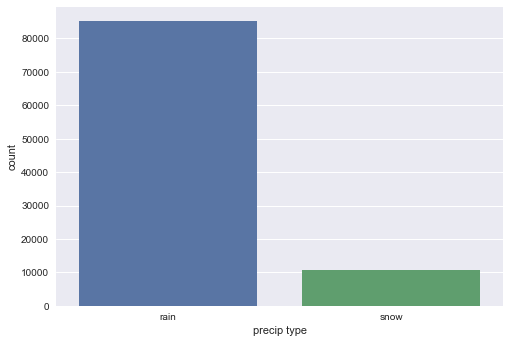

In [210]:
sns.countplot(data=df,x='precip type')

In [211]:
# summary for numerical features
df.describe()

,temperature (c),apparent temperature (c),humidity,wind speed (km/h),wind bearing (degrees),visibility (km),loud cover,pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


## Exploratory Data Analysis

 - Histograms for quantity distribution (numerical features)

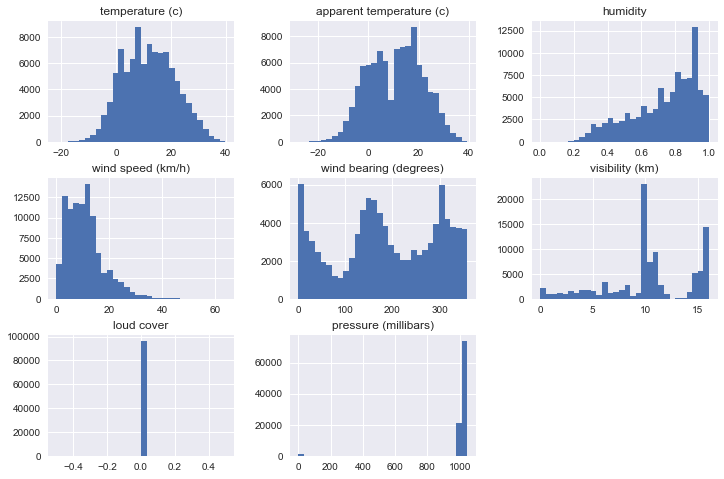

In [212]:
df.hist(bins=30,figsize=(12,8))
plt.show()

Overall Distribution notes:
 - *temperature* & *apparent temperature* have a **normal distribution** (they follow a type of bell-shape\)
 - *humidity* has a **left-skewed distribution** (long tail extends to the left while most values cluster on the right)
 - *wind speed* has a **right-skewed distribution**
 - *wind bearing* & *visibility* have a **multimodal distribution** (has more than one peak)
 - *loud cover* has all 0-values (we can drop this feature)

In [213]:
df = df.drop("loud cover", axis=1)

 - pressure has some values at 0 - they're probably missing values as there's no pressure = 0 in real-life
 - we can replace these with the pressure median

<AxesSubplot:>

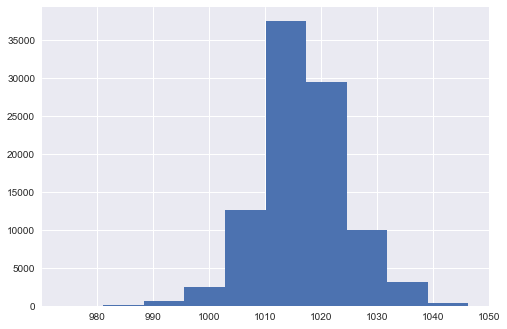

In [214]:
pressure_median = df["pressure (millibars)"].median()

def replace_pressure_zeros(row):
    if row == 0:
        return row + pressure_median
    else:
        return row

df["pressure (millibars)"] = df.apply(lambda x: replace_pressure_zeros(x["pressure (millibars)"]), axis=1)
df["pressure (millibars)"].hist()

 - Check humidity distribution by *Summary*

array([[<AxesSubplot:title={'center':'Breezy'}>,
        <AxesSubplot:title={'center':'Breezy and Dry'}>,
        <AxesSubplot:title={'center':'Breezy and Foggy'}>,
        <AxesSubplot:title={'center':'Breezy and Mostly Cloudy'}>,
        <AxesSubplot:title={'center':'Breezy and Overcast'}>],
       [<AxesSubplot:title={'center':'Breezy and Partly Cloudy'}>,
        <AxesSubplot:title={'center':'Clear'}>,
        <AxesSubplot:title={'center':'Dangerously Windy and Partly Cloudy'}>,
        <AxesSubplot:title={'center':'Drizzle'}>,
        <AxesSubplot:title={'center':'Dry'}>],
       [<AxesSubplot:title={'center':'Dry and Mostly Cloudy'}>,
        <AxesSubplot:title={'center':'Dry and Partly Cloudy'}>,
        <AxesSubplot:title={'center':'Foggy'}>,
        <AxesSubplot:title={'center':'Humid and Mostly Cloudy'}>,
        <AxesSubplot:title={'center':'Humid and Overcast'}>],
       [<AxesSubplot:title={'center':'Humid and Partly Cloudy'}>,
        <AxesSubplot:title={'center':'Light R

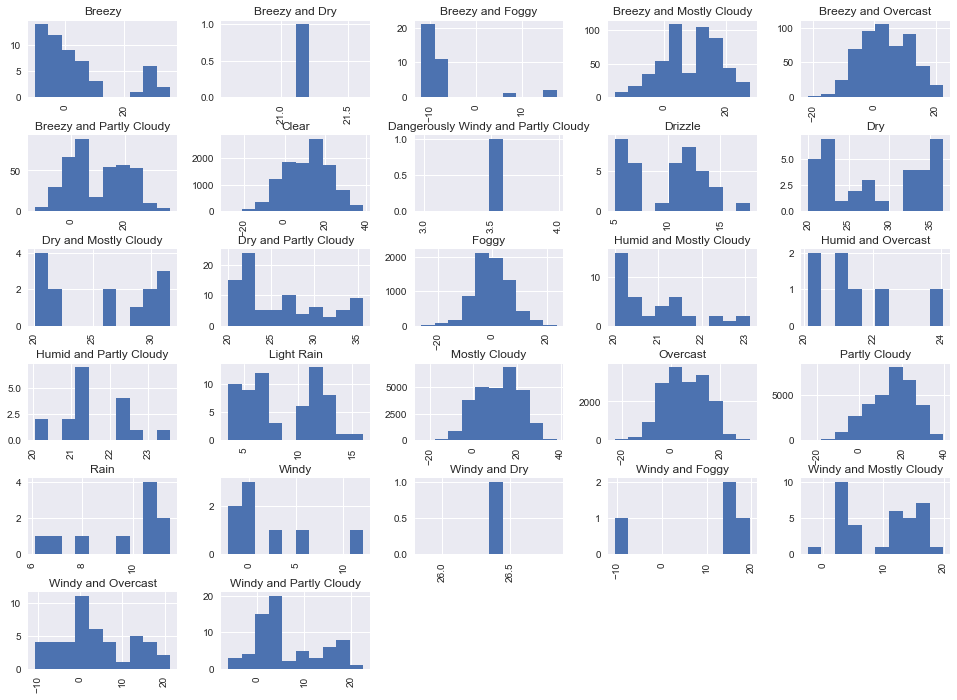

In [215]:
df["apparent temperature (c)"].hist(by=df["summary"], figsize=(16,12))

 - This also tell us that there are many unique Summary types, we could group these to have better representation of the data

## Feature Engineering

- check all unique values in Summary

In [216]:

len(df["summary"].unique())

27

 - check value count in Sumary

<AxesSubplot:xlabel='count', ylabel='summary'>

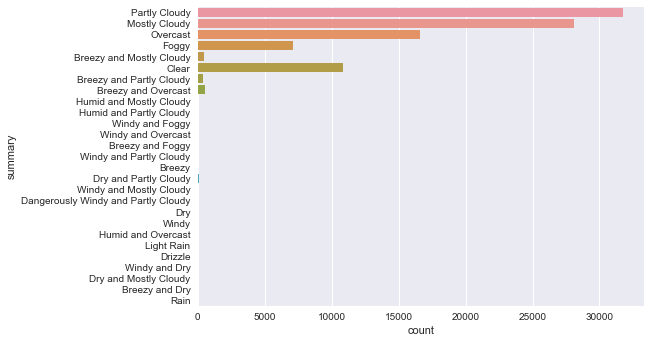

In [217]:
sns.countplot(y=df["summary"])

 - We can see that are are in total 27 but only a few appear to have the highest frequency
 - Let's check realtive frequency to determine how to group these


In [218]:
df_req_summary = pd.crosstab(index=df["summary"], columns="count")
df_relative_freq_summary = df_req_summary / df_req_summary.sum()
df_relative_freq_summary
df_relative_freq_summary.sort_values(by="count", ascending=False)


col_0,count
summary,
Partly Cloudy,0.329000
Mostly Cloudy,0.291271
Overcast,0.172073
Clear,0.112905
Foggy,0.074109
Breezy and Overcast,0.005474
Breezy and Mostly Cloudy,0.005350
Breezy and Partly Cloudy,0.004002
Dry and Partly Cloudy,0.000892


 - partly cloudy (33%); mostly cloudy (29%); overcast (17%); clear (11%); foggy (7%) = 97% of total
 - we can create a new categorical feature: cloud (summary)
 - other weather characteristics in Summary are only a few & contained in other variables (e.g. wind speed, precip type, humidity)

<AxesSubplot:xlabel='cloud (summary)', ylabel='count'>

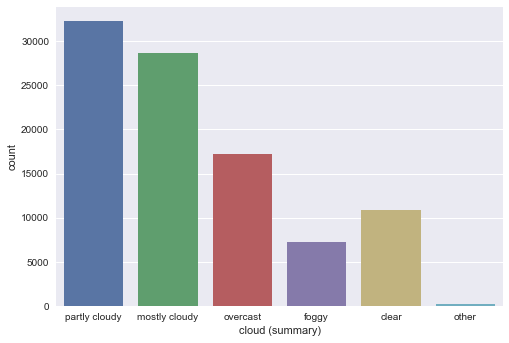

In [222]:
def cloud_category(row,default_category="other"):
    row = str(row).lower()
    if "foggy" in row:
        category = "foggy"
    elif "overcast" in row:
        category = "overcast"
    elif "mostly cloudy" in row:
        category = "mostly cloudy"
    elif "partly cloudy" in row:
        category = "partly cloudy"
    elif "clear" in row:
        category = "clear"
    else:
        category = default_category
    return category

df["cloud (summary)"] = df.apply(lambda row: cloud_category(row["summary"]), axis=1)
sns.countplot(df["cloud (summary)"])

 - Let's explore category "other" to see if it's similar to any other category
 - and compare it with visibility as this correlates to cloudy (summary)

<AxesSubplot:xlabel='cloud (summary)', ylabel='visibility (km)'>

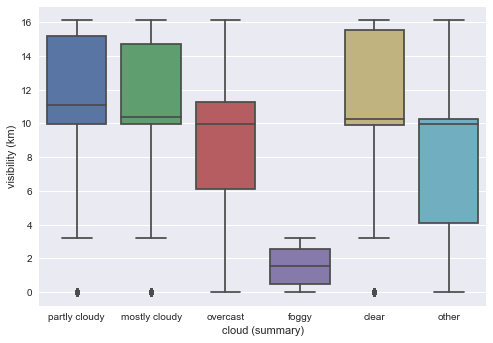

In [220]:
sns.boxplot(x=df["cloud (summary)"], y=df["visibility (km)"])

 - here can see that other & overcast are similar in terms of visibility
 - we can set these in overcast instead of "other"

<AxesSubplot:xlabel='cloud (summary)', ylabel='count'>

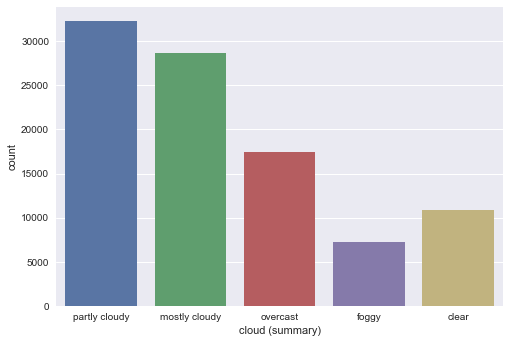

In [223]:
df["cloud (summary)"] = df.apply(lambda row: cloud_category(row["summary"],"overcast"), axis=1)
sns.countplot(df["cloud (summary)"])

## Univariate Analysis

In [229]:
# focus on numerical features
numerical_features = df.select_dtypes(include=["int64","float64"]).keys()
print(numerical_features)
print(len(numerical_features))

Index(['temperature (c)', 'apparent temperature (c)', 'humidity',
       'wind speed (km/h)', 'wind bearing (degrees)', 'visibility (km)',
       'pressure (millibars)'],
      dtype='object')
7


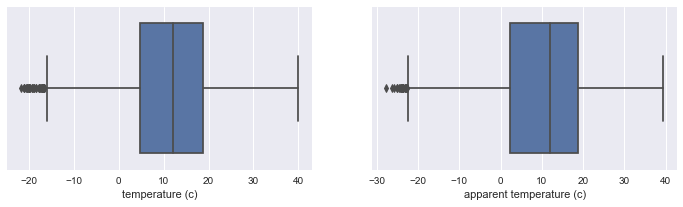

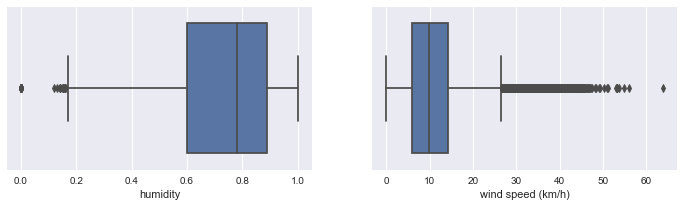

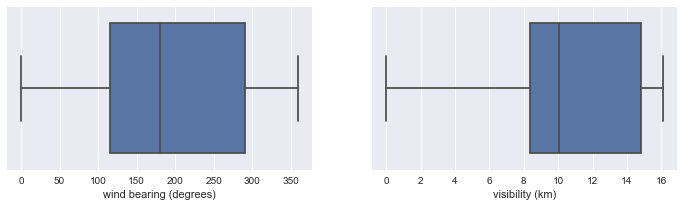

In [233]:
i = 0
while i < 6:
    fig = plt.figure(figsize=[12,3])
    plt.subplot(1,2,1)
    sns.boxplot(x=numerical_features[i], data=df)
    i += 1
    plt.subplot(1,2,2)
    sns.boxplot(x=numerical_features[i], data=df)
    i += 1
    plt.show()
# TO DO: pressure is excluded cause it returns an error with formated subplots above (out of range cause it's paring int) - find a way to solve this

Boxplot notes:
 - *temperature & apparent temperature* has a normal dist. with a couple of outliers the towards lower quartile
 - *humidty* has a left skew and frequency of values lead more towards the max
 - *wind speed* has a right skew & frequencies lean strongly to the min (several outliers on the right)
 - *wind bearing* looks normally distributed here but that's due to it being bimodal
 - *visibility* leans towards the max

## Multivariate Analysis

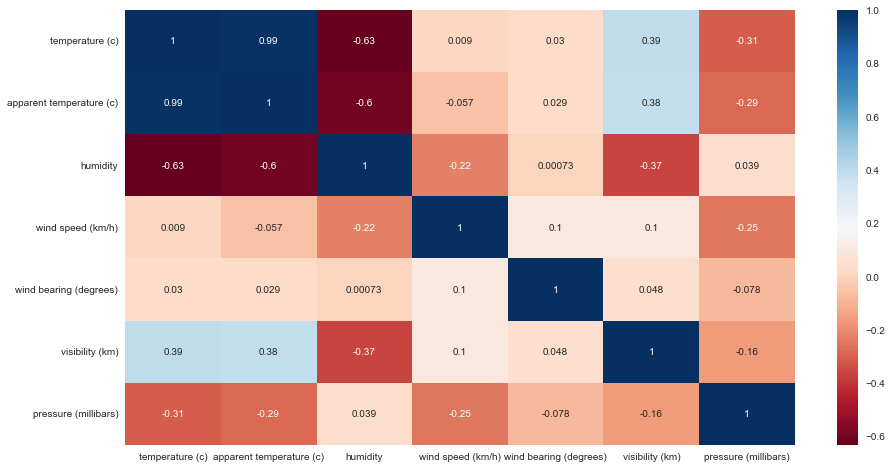

In [235]:
# heatmap correlation
fig = plt.figure(figsize=[15,8])
sns.heatmap(df.corr(), annot=True, cmap='RdBu')
plt.show()

Correlation notes:
 - this indicates that *humidity* has the highest correlation (negative) with temperature
 - then *visibility* correlates to temperature but not so strong

In [241]:

# sns.pairplot(df[['temperature (c)', 'apparent temperature (c)']], diag_kind='kde', hue='cloud (summary)')

### References:
 - [Understanding histograms](https://statisticsbyjim.com/basics/histograms/)
 - [Understanding box & whisker plots](https://flowingdata.com/2008/02/15/how-to-read-and-use-a-box-and-whisker-plot/)